# MLP from Scratch
#### by Pio Lauren T. Mendoza

A 3 layer MLP model is trained to characterized a gaussian distribution with mean $\mu$ and standard deviation $\sigma$. The mean and standard deviation are asked as an input from the user.

Importing numpy and pyplot while setting other global parameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
np.random.seed(201504074)
%matplotlib inline

Defining the user interface function

In [2]:
def getMeanAndSTD():
    while True:
        mean = input("Input the mean: ")
        try:
            # check if float
            mean = float(mean) 
            break
        except:
            print("Input must be a real number!")
    while True:
        std = input("Input the standard deviation: ")
        try:
            std = float(std)
            if(std > 1e-12):
                break
            print("Input must not be equal to 0!")
        except ValueError:
            print("Input must be a real number!")
        
    return mean, std

Creating dataset. The inputs are from $[\mu-2\sigma, \mu+2\sigma]$. These inputs will be used for the gaussian function with the mean and std from the user - the output of the gaussian function will serve as output of the dataset.

Random sampling an input from a 1D gaussian distribution for a given mean and variance.

In [3]:
def getSamples(mean, std, size=(1_000_000,1)):
    return np.random.normal(mean, std, size)

Generating the probabilities of the random samples distributed in 1000 bins and the bins.

In [4]:
def getGaussianDataset(x, bins = 1000):
    y, x = np.histogram(x, bins=bins, density=True)
    return x[:-1], y

To prove that the dataset generator is indeed making a probability density function of a gaussian distribution, we'll test it with the mean 0 and variance of 1.

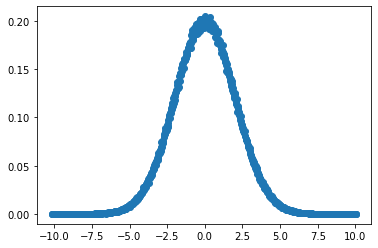

In [5]:
samples = getSamples(0,2)
x,y = getGaussianDataset(samples)

plt.scatter(x,y)

The graph has a bell curve shape and seems to be centered at 0.

To prove it is a valid pdf the integral for the whole range must be equal to one. An integral of function can be imagined as the sum of the areas of the thin rectangles under the curve, i.e. bin width multiplied by it's normalize frequency/probability. Proving it using the data.

In [6]:
print(f"Integral from negative infinity to positive infinity: {np.sum((x[1] - x[0])*y)}")

Integral from negative infinity to positive infinity: 1.0000000000000426


This is equal to one, considering the floating point arithmithic inaccuracies, therefore the pdf/binning is valid.

To make things more systematic and manageable, using OOP for the MLP modelling, training, and testing would be better.

#### Mathematics behind the gradients
The partial derivatives of $L$ with respect to $W_{2}$ and $b_{2}$
$$\frac{\partial L}{\partial \textbf{$W_{2}$}} = 
\frac{\partial L}{\partial \textbf{$f_{3}$}} \frac{\partial \textbf{$f_{3}$}}{\partial \textbf{$z_{3}$}} \frac{\partial\textbf{$z_{3}$}}{\partial\textbf{$W_{2}$}}$$
$$\frac{\partial L}{\partial \textbf{$b_{2}$}} = 
\frac{\partial L}{\partial \textbf{$f_{3}$}} \frac{\partial \textbf{$f_{3}$}}{\partial \textbf{$z_{3}$}} \frac{\partial\textbf{$z_{3}$}}{\partial\textbf{$b_{2}$}}$$
The loss function used is **MSE** therefore,
$$L = (y-f_{3})^{T}(y-f_{3})$$
$$\frac{\partial L}{\partial \textbf{$f_{3}$}} = -2\left(y-f_{3}\right)$$
Batch mode is stochastic hence $N = 1$ <br/>
$f_{3}$ is the sigmoid function
$$f_{3} = \frac{1}{1 - e^{-z_{3}}}$$
Getting the partial derivative of $f_{3}$ with respect to the immidiate parameters.
$$\frac{\partial \textbf{$f_{3}$}}{\partial \textbf{$z_{3}$}} = \frac{e^{-\textbf{$z_{3}$}}}{1+e^{-\textbf{$z_{3}$}}}$$
$z_{3}$ is the input to the sigmoid function $f_{3}$
$$z_{3} = \textbf{$W_{2} f_{2}$} + \textbf{$b_{2}$}$$
Getting the derivative of $z_{3}$ with respect to $W_{2}$,
$$\frac{\partial\textbf{$z_{3}$}}{\partial\textbf{$W_{2}$}} = f_{2}$$
Getting the derivative of $z_{3}$ with respect to $b_{2}$,
$$\frac{\partial\textbf{$z_{3}$}}{\partial\textbf{$b_{2}$}} = 1$$
The second hidden layer parameters' gradient.
$$\frac{\partial L}{\textbf{$W_{1}$}} = \frac{\partial L}{\partial f_{3}} \frac{\partial f_{3}}{\partial \textbf{$z_{3}$}} 
\frac{\partial \textbf{$z_{3}$}}{\partial f_{2}} \frac{\partial f_{2}}{\partial \textbf{$z_{2}$}}
\frac{\partial \textbf{$z_{2}$}}{\partial \textbf{$W_{1}$}}$$
Getting the derivative of $z_{3}$ with respect to $f_{2}$,
$$\frac{\partial\textbf{$z_{3}$}}{\partial\textbf{$f_{2}$}} = \textbf{$W_{2}$}$$
Note that $f_{2}$ and $f_{1}$ are relus, therefore
$$\textbf{$f_{2}$} = max(0, \textbf{$z_{2}$})$$
$$\frac{\partial\textbf{$f_{2}$}}{\partial\textbf{$z_{2}$}} = 
    \begin{cases}
       1 & \text{if $z_{2} > 0$}\\
       0 & \text{if $z_{2} \leq 0$}
    \end{cases}$$
This must be continued until the $\frac{\partial L}{\partial \textbf{$W_{0}$}}$ and $\frac{\partial L}{\partial \textbf{$b_{0}$}}$ are reached.

In general, the partial products are the foollowing:
$$\frac{\partial\textbf{L}}{\partial\textbf{$z_n$}} = \frac{\partial\textbf{L}}{\partial\textbf{$f_n$}} \cdot 
\frac{\partial\textbf{$f_n$}}{\partial\textbf{$z_n$}}$$
$$\frac{\partial\textbf{L}}{\partial\textbf{$W_{n-1}$}} = \frac{\partial\textbf{L}}{\partial\textbf{$z_n$}} 
\cdot \frac{\partial\textbf{$z_n$}}{\partial\textbf{$W_{n-1}$}} = \frac{\partial\textbf{L}}{\partial\textbf{$z_n$}} \cdot \textbf{$f_{n-1}$}$$
$$\frac{\partial\textbf{L}}{\partial\textbf{$b_{n-1}$}} = \frac{\partial\textbf{L}}{\partial\textbf{$z_n$}} 
\cdot \frac{\partial\textbf{$z_n$}}{\partial\textbf{$b_{n-1}$}} = \frac{\partial\textbf{L}}{\partial\textbf{$z_n$}} \cdot 1$$
<br/>
<br/>
In matrix form, the partial products are the following:
<br/>
$$\frac{\partial\textbf{L}}{\partial\textbf{$W_{n-1}$}} = \textbf{$\delta_{n-1}$} \times \textbf{$f_{n-1}^T$}$$
$$\frac{\partial\textbf{L}}{\partial\textbf{$b_{n-1}$}} = \textbf{$\delta_{n-1}$} \cdot 1$$
<br/>
Where
$$\delta_{n} = -2\left(y-f_{L}\right) \circ dsigmoid(\textbf{$z_{L}$})$$
For the last layer weights and biases.
$$\delta_{n-1} = \left(W_{n-1}^{T} \times \textbf{$\delta_{n}$}\right) \circ drelu(\textbf{$z_{n-1}$})$$
For the other layers.


learning rate = 0.1
batch size = 1

In [197]:
class MLP:
    """
    MLP class
    Initialize a model
    Handles training and testing of the model
    """
    def __init__(self, inputSize, hiddenLayerSize, outputSize):
        """
        Inputs:
            inputSize: size of input
            hiddenLayerSize: a list containing the number of units per hidden layer
            outputSize: size of output
        """
        self.__inputSize = inputSize
        self.__hiddenLayerSize = hiddenLayerSize
        self.__outputSize = outputSize
        self.__layers = [inputSize] + hiddenLayerSize + [outputSize]
        
        self.__weights = [] # the weight matrix
        # initializing weights
        for i in range(len(self.__layers) - 1):
            # connection between previous layer's neurons to next layer's neurons
            # Dense
            # normal distribution, mean 0, std 0.01
            self.__weights.append(np.random.normal(0, 0.01, (self.__layers[i+1], self.__layers[i])))
            
        self.__biases = []
        for i in range(1, len(self.__layers)):
            # biases per activation unit
            # just using 0s as initial bias
            self.__biases.append(np.zeros((self.__layers[i], 1)))
            
        self.__dweights = []
        for i in range(len(self.__layers) - 1):
            # partial derivatives of the loss function with respect to the weights
            self.__dweights.append(np.zeros((self.__layers[i+1], self.__layers[i])))
            
        self.__dbiases = []
        for i in range(1, len(self.__layers)):
            # partial derivatives of the loss function with respect to the biases
            self.__dbiases.append(np.zeros((self.__layers[i], 1)))
            
        self.__activations = []
        for i in range(len(self.__layers)):
            # cache of different actions per propagation
            self.__activations.append(np.zeros((self.__layers[i], 1)))
            
        self.__activationInputs = []
        for i in range(len(self.__layers)):
            # cache for the z_i/inputs to the activation layer
            self.__activationInputs.append(np.zeros((self.__layers[i], 1)))
        
            
    def printWeights(self):
        """
        Prints the weights matrices
        """
        print("Weights dim: ", len(self.__weights))
        for weight in self.__weights:
            print(weight)
            print('')
            print(weight.shape)
            print('')
    
    def printDweights(self):
        """
        Prints the dweights matrices
        """
        print("dWeights dim: ", len(self.__weights))
        for weight in self.__dweights:
            print(weight)
            print('')
            print(weight.shape)
            print('')
            
    def printBiases(self):
        """
        Prints the biases matrices
        """
        print("Bias dim: ", len(self.__biases))
        for bias in self.__biases:
            print(bias)
            print('')
            print(bias.shape)
            print('')
            
    def printDbiases(self):
        """
        Prints the dbiases matrices
        """
        print("dBias dim: ", len(self.__dbiases))
        for bias in self.__dbiases:
            print(bias)
            print('')
            print(bias.shape)
            print('')
            
    def printActivations(self):
        """
        Prints the activation matrices
        """
        print("Activations dim: ", len(self.__activations))
        for activations in self.__activations:
            print(activations)
            print('')
            print(activations.shape)
            print('')
            
    def printZ(self):
        """
        Prints the activation matrices
        """
        print("z dim: ", len(self.__activationInputs))
        for activations in self.__activationInputs:
            print(activations)
            print('')
            print(activations.shape)
            print('')
    
    def forwardPropagation(self, inputs):
        """
        inputs: the input data
        does the forward propagation
        """
        # current activation is the input
        activation = np.array(inputs).reshape((-1, 1)) 
        self.__activations[0] = activation
        self.__activationInputs[0] = activation
        # 2 ReLU hidden layers
        for i, weights, biases in zip(range(1, len(self.__weights[:-1]) + 1), self.__weights[:-1], self.__biases[:-1]):
            inputs = weights.dot(activation) + biases
            self.__activationInputs[i] = inputs
            activation = self._relu(inputs)
            self.__activations[i] = activation
        # sigmoid output later
        inputs = self.__weights[-1].dot(activation) + self.__biases[-1]
        self.__activationInputs[-1] = inputs
        output = self._sigmoid(inputs)
        self.__activations[-1] = output
#         print("*"*10)
#         print("z dims:")
#         for i, j in enumerate(self.__activationInputs):
#             print(i, j.shape)
#         print("activations dims:")
#         for i, j in enumerate(self.__activations):
#             print(i, j.shape)
#         print("weights dims:")
#         for i, j in enumerate(self.__weights):
#             print(i, j.shape)
#         print("biases dims:")
#         for i, j in enumerate(self.__biases):
#             print(i, j.shape)
#         print("*"*10)
        return output

    def backPropagation(self, loss):
        # does the computation of the partial derivatives and then does the gradient descent
        # calculate the derivatives of the last weights and biases with respect to the loss function
        # last year we will use is a sigmoid
        # lost is only scalar
        # for w_2 and b_2
        self.__dbiases[-1] = -2 * loss * self._dsigmoid(self.__activationInputs[-1])
        self.__dweights[-1] = self.__dbiases[-1] @ self.__activations[-2].T
        # for w_0-1, b_0-1
        for i in reversed(range(len(self.__dweights) - 1)):
            self.__dbiases[i] = (self.__weights[i+1].T @ self.__dbiases[i+1]) * self._drelu(self.__activationInputs[i+1])
            self.__dweights[i] = self.__dbiases[i] @ self.__activations[i].T
    
    def gradientDescent(self, learningRate):
        # updates the current weights and biases by subtracting a portion, attenuated by learning rate, of the gradient
        for i in range(len(self.__weights)):
            # updating weights
            self.__weights[i] -= learningRate*self.__dweights[i]
            
            # updating biases
            self.__biases[i] -= learningRate*self.__dbiases[i]
            
    def train(self, x, y, epochs, learningRate, verbose = True):
        for i in range(epochs):
            # random sampling the training set per epoch
            indices = np.array(range(len(x)))
            np.random.shuffle(indices)
            x = x[indices]
            y = y[indices]
            mse = 0
            for inputs, targets in zip(x, y):
                # forward propagation
                predictions = self.forwardPropagation(inputs)
                
                # error calculation
                loss = targets - predictions# take note that this is the derivative of the loss function with respect to sigmoids activation
                
                # backpropagation
                self.backPropagation(loss)
                
                # updating weights and biases
                self.gradientDescent(learningRate)
                
                # calculating the error/MSE
                mse += self._MSE(targets, predictions)
            if verbose:
                print("MSE: {:e} at epoch {}".format(mse/len(x), i))
            
    def evaluate(self, x, y):
        output = []
        mse = 0
        for inputs, targets in zip(x, y):
            # forward propagation
            predictions = self.forwardPropagation(inputs)
            output.append(predictions)
            
            # error calculation
            loss = targets - predictions# take note that this is the derivative of the loss function with respect to sigmoids activation

            # calculating MSE
            mse += self._MSE(targets, predictions)
            
        predictions = np.array(output)
        print(f"MSE: {mse/len(x):e} of the test set")
        
        # plotting test dataset vs prediction for visualization purposes
        plt.scatter(x, y, color='r', s=2)
        plt.scatter(x, output, color='b', s=2)
        plt.xlabel('Sample')
        plt.ylabel('Probability')
        plt.title('Gaussian Distribution Dataset vs Prediction')
        plt.legend(['Dataset', 'Prediction'])
        plt.show()        

    def _MSE(self, target, predict):
        return np.average((target-predict)**2)
    
    def _relu(self, x):
        """
        computes for the rectified linear units output for given input x
        """
        return np.maximum(x, 0)
    
    def _drelu(self, x):
        """
        computes for the differentiated rectified linear units output for given input x
        """
        return np.greater(x, 0).astype(np.int)

    def _sigmoid(self, x):
        """
        computes for the sigmoid output for given input x
        """
        return 1.0/(1.0 + np.exp(-x))
    
    def _dsigmoid(self, x):
        """
        computes for the differentiated output for given input x
        """
        return np.exp(-x)/((1.0 + np.exp(-x))**2)

* **class MLP** accepts inputSize, hiddenLayerSize, outputSize for the constructor. The inputSize is the number of nodes in the input layer. The hiddenLayerSize is a list containing the number of hidden units/ nodes per hidden layer. The outputSize is the number of nodes in the output layer.
* protected function forwardpropagation calculates the output for a given input and current weights and biases. 
* protected function backpropagation calculates the gradients.
* function train uses forward propagation and backpropagation; updates weights and biases by substracting a portion of the gradients from the weights and biases.
* function evaluate uses forward propagation and evaluates the performance of the network interms of MSE.

In [176]:
# y = a.forwardPropagation(x)
# loss = yTarget - y
# print(loss)
# a.backPropagation(loss)


# a.printWeights()
# a.printBiases()
# a.printZ()
# a.printActivations()
# a.printDweights()
# a.printDbiases()

# a.gradientDescent(0.5)
# a.printWeights()
# a.printBiases()


samples = getSamples(0, 1)
x, y = getGaussianDataset(samples)
indices = np.arange(len(x))
np.random.shuffle(indices)
trainDataPercentage = 0.9

# dividing to train and test datasets
xtrain = x[indices][: int(trainDataPercentage*x.shape[0])]
ytrain = y[indices][: int(trainDataPercentage*y.shape[0])]
xtest = x[indices][int(trainDataPercentage*x.shape[0]): ]
ytest = y[indices][int(trainDataPercentage*y.shape[0]): ]



hiddenLayers = [64, 64]
a = MLP(1, hiddenLayers, 1)

x = xtrain
y = ytrain

indices = np.array(range(len(x)))
np.random.shuffle(indices)
x = x[indices]
y = y[indices]

for x, y in zip(x, y):
    print(x, y)


-4.48999903581237 0.0
0.7143618434930294 0.30798594432097876
3.2329183370699335 0.0022362015759278984
1.8162303094329246 0.07897857384072623
-4.3030749210547095 0.0
-2.610919776932727 0.013518854981745931
4.413491693434106 0.0
0.3798660591898466 0.36663541292599683
-3.8603599124181445 0.000406582104714145
-0.643297516325771 0.32963644139697823
-2.6797865560539704 0.01077442577492533
-2.512538663902379 0.015551765505316749
-3.9980934706606313 0.0003049365785356225
2.93777499797889 0.005183921835105583
-0.8794121875986054 0.27413798410352463
2.160564205039142 0.037710490212238656
-0.6334594050227356 0.3321775795514715
2.1310498711300374 0.03964175520963093
3.5870903439791855 0.0010164552617854083
-1.1942317492957186 0.19993674999318084
-2.24690965872044 0.03242492285095453
0.4782471722201942 0.3515918750515728
0.7340380660990986 0.29721151854605343
-3.122501564690536 0.0030493657853560875
4.27575813519162 0.00010164552617854085
-2.94541556123591 0.00487898525656974
4.905397258585846 0.0


Defining main. Main calls all the function from getting the mean and std, making dataset, modelling MLP, up to training and evaluating MLP model.

In [201]:
def main(interactive = True, mean = None, std = None):
    # getting the mean and std from user
    if interactive:
        mean, std = getMeanAndSTD()
    
    # preparing the input and output dataset
    samples = getSamples(mean, std)
    x, y = getGaussianDataset(samples)
    indices = np.arange(len(x))
    np.random.shuffle(indices)
    trainDataPercentage = 0.9
    
    # dividing to train and test datasets
    xtrain = x[indices][: int(trainDataPercentage*x.shape[0])]
    ytrain = y[indices][: int(trainDataPercentage*y.shape[0])]
    xtest = x[indices][int(trainDataPercentage*x.shape[0]): ]
    ytest = y[indices][int(trainDataPercentage*y.shape[0]): ]
    
    # plotting dataset
    plt.scatter(xtrain, ytrain, color='r', s=0.9)
    plt.scatter(xtest, ytest, color='b', s=0.9)
    plt.xlabel('Sample')
    plt.ylabel('Probability')
    plt.title(f'Gaussian Distribution Dataset, mean: {mean}, std: {std}')
    plt.legend(['Train Dataset', 'Test Dataset'])
    plt.show()
    
    # creating the mlp model (hidden layers are relus while output layer is sigmoid)
    inputSize = 1 
    hiddenLayerSize = [64, 64]
    outputSize = 1
    model = MLP(inputSize, hiddenLayerSize, outputSize)
    
    # training mlp model
    learningRate = 0.1
    epochs = 20
    model.train(xtrain, ytrain, epochs, learningRate, interactive)
    
    # evaluating the model
    print(f'Gaussian Distribution Dataset, mean: {mean}, std: {std}')
    model.evaluate(xtest, ytest)

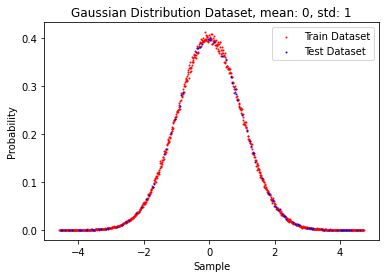

Gaussian Distribution Dataset, mean: 0, std: 1
MSE: 6.133056e-05 of the test set


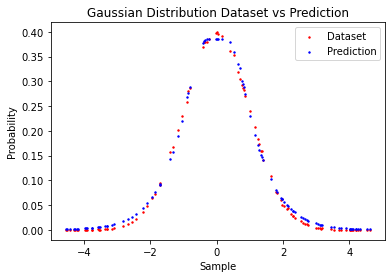

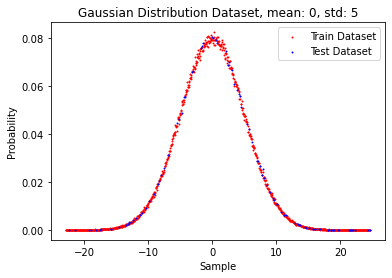

Gaussian Distribution Dataset, mean: 0, std: 5
MSE: 3.237158e-05 of the test set


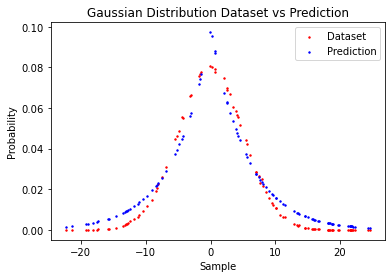

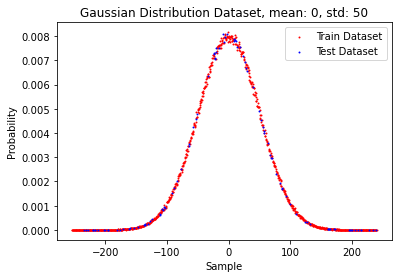

Gaussian Distribution Dataset, mean: 0, std: 50
MSE: 1.426469e-05 of the test set


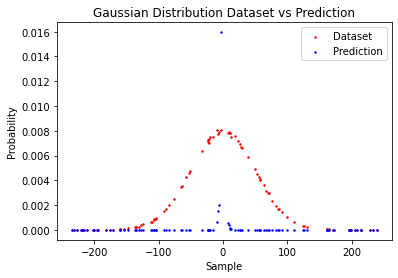

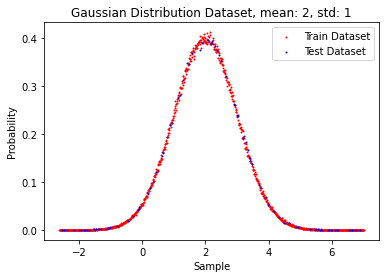

Gaussian Distribution Dataset, mean: 2, std: 1
MSE: 7.828883e-05 of the test set


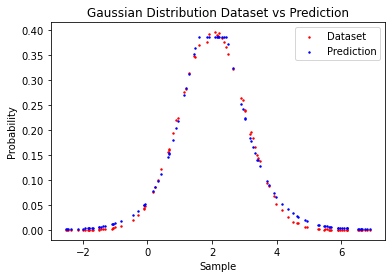

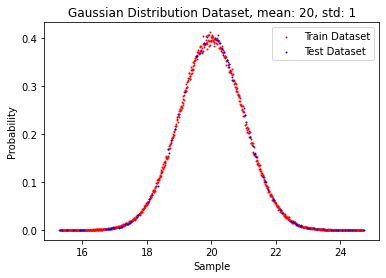

Gaussian Distribution Dataset, mean: 20, std: 1
MSE: 2.120634e-02 of the test set


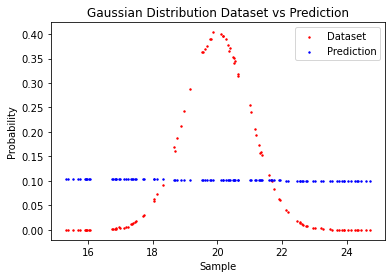

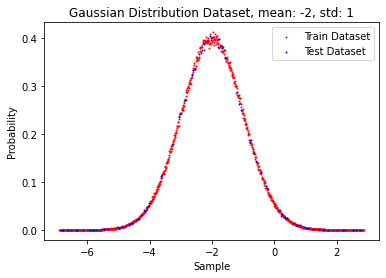

Gaussian Distribution Dataset, mean: -2, std: 1
MSE: 9.199232e-05 of the test set


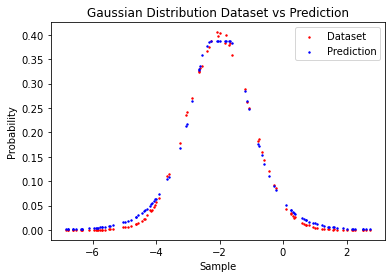

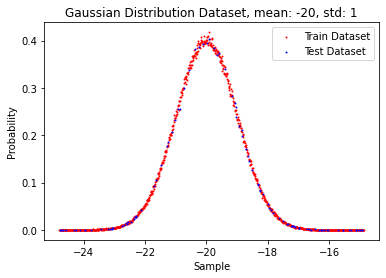

Gaussian Distribution Dataset, mean: -20, std: 1
MSE: 1.605211e-02 of the test set


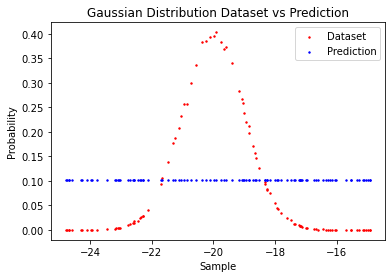

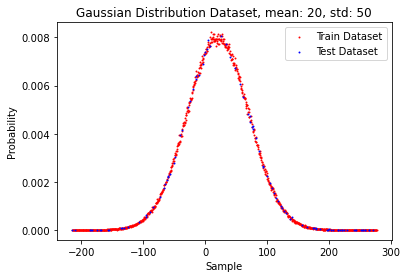

Gaussian Distribution Dataset, mean: 20, std: 50
MSE: 7.653223e-05 of the test set


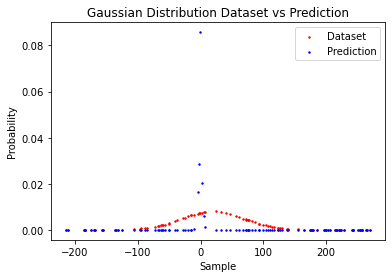

In [207]:
# some test
if __name__ == "__main__":
    # normal distribution
    main(False, 0, 1)
    # mean: 0, std: 5
    main(False, 0, 5)
    # mean: 0, std: 50
    main(False, 0, 50)
    # mean: 2, std: 1
    main(False, 2, 1)
    # mean: 20, std: 1
    main(False, 20, 1)
    # mean: 20, std: 50
    # mean: -2, std: 1
    main(False, -2, 1)
    # mean: -20, std: 1
    main(False, -20, 1)
    # mean: 20, std: 50
    main(False, 20, 50)

#### Observations
As we could see, the 3 layer MLP model performance varies depending on the data set which it is trained. The model performed well when it was trained with a gaussian distribution data set with mean 0 and std 1. The MSE for the train and evaluation for this dataset is already in the micro range, $99.129\mu$. The model can still somehow predict the output when the mean and std are moved slightly. The performance worsens at larger variation from the normal distribution. The MSE for this scenario is already in the milli range, $23.16875m$. The prediction can no long follow, as seen in the graphs the prediction is already a flat line rather a bell shape distribution. <br/>
This 3 layer MLP model only has a 4353 parameters. It is quite small so the performance is expected not to perform in other dataset.

Input the mean:  0
Input the standard deviation:  1


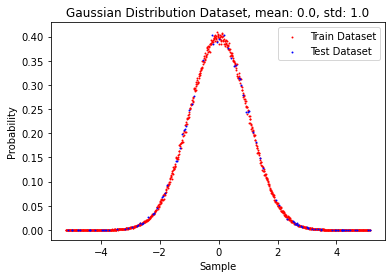

MSE: 2.788124e-02 at epoch 0
MSE: 1.799318e-02 at epoch 1
MSE: 1.772424e-02 at epoch 2
MSE: 1.682550e-02 at epoch 3
MSE: 1.307336e-02 at epoch 4
MSE: 5.846276e-03 at epoch 5
MSE: 1.449986e-03 at epoch 6
MSE: 3.323536e-04 at epoch 7
MSE: 1.426852e-04 at epoch 8
MSE: 1.123983e-04 at epoch 9
MSE: 1.055413e-04 at epoch 10
MSE: 1.045567e-04 at epoch 11
MSE: 1.028106e-04 at epoch 12
MSE: 1.019686e-04 at epoch 13
MSE: 1.016978e-04 at epoch 14
MSE: 1.016443e-04 at epoch 15
MSE: 9.973700e-05 at epoch 16
MSE: 9.887682e-05 at epoch 17
MSE: 9.635703e-05 at epoch 18
MSE: 9.222893e-05 at epoch 19
Gaussian Distribution Dataset, mean: 0.0, std: 1.0
MSE: 9.847403e-05 of the test set


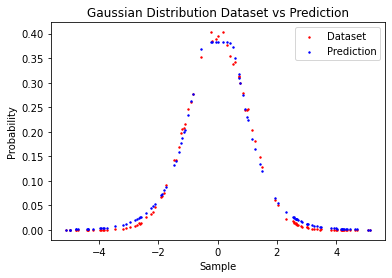

In [208]:
# interactive mode
if __name__ == "__main__":
    main()